In [33]:
import pandas as pd
import numpy as np
import json
import os
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

In [2]:
FIGSIZE = (13, 6)
CONFIDENCE = 0.95

In [3]:
def errors(estimates):
    """
    Return the confidence interval given the statistics of bootstrap resamplings.
    Computes the lower and uppper bounds of the confidence interval.
    """
    m, se = np.mean(estimates), np.std(estimates)
    lower, upper = scipy.stats.norm.interval(CONFIDENCE, loc=m, scale=se)
    return lower, upper

In [5]:
with open('non_incent_results.json') as f:
    non_incent = json.load(f)
with open('incent_results.json') as f:
    incent = json.load(f)
plot_names = list(incent[0].keys())

In [6]:
plot_names

['sentiment_distribution_by_rating',
 'avg_length_by_category',
 'avg_compound_by_category',
 'num_reviews_by_price_tier',
 'avg_length_by_price_tier',
 'avg_length_by_overall',
 'avg_compound_by_rating',
 'num_reviews_by_category',
 'num_reviews_by_overall']

avg_length_by_category


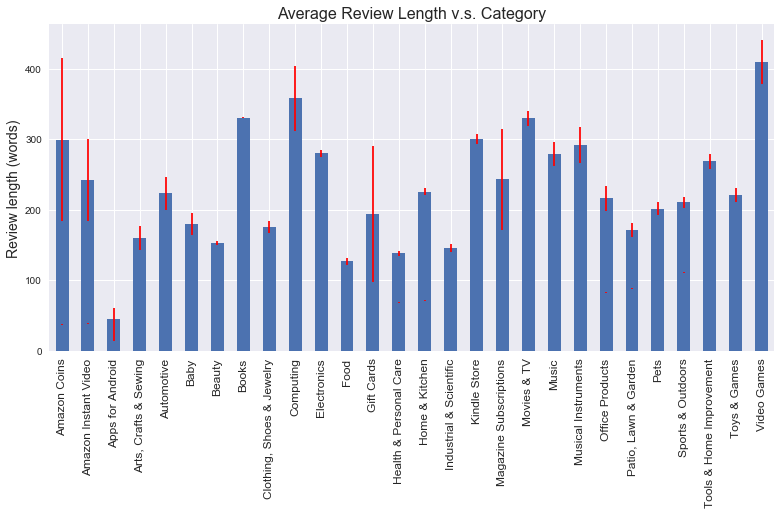

In [138]:
name = 'avg_length_by_category'
print(name)

# Put data into a dataframe, and compute mean and confidence interval
data0 = sum([d[name] for d in non_incent], [])
df0 = pd.DataFrame(data0)
df0 = df0.groupby('main_category').agg({'_c1': [np.mean, np.std, errors]})
df0.columns = df0.columns.droplevel()

data1 = sum([d[name] for d in incent], [])
df1 = pd.DataFrame(data1)
df1 = df1.groupby('main_category').agg({'_c1': [np.mean, np.std, errors]})
df1.columns = df1.columns.droplevel()

# Sort by values
df0.sort_values(by='mean', inplace=True)

# Plot
fig, ax = plt.subplots(figsize=FIGSIZE)
err0 = np.array(df0.errors.values.tolist())-df0['mean'].values[..., np.newaxis]
err1 = np.array(df1.errors.values.tolist())-df1['mean'].values[..., np.newaxis]
df0['mean'].plot(kind='bar', ax=ax, yerr=err0.T, ecolor='r')
df1['mean'].plot(kind='bar', ax=ax, yerr=err1.T, ecolor='r')

# Settings of the plot
plt.title('Average Review Length v.s. Category', fontsize=16)
plt.xlabel('')
plt.ylabel('Review length (words)', fontsize=14)
plt.xticks(fontsize=12)

# Save the plot
fig.savefig(name+'.png', bbox_inches='tight')

In [88]:
mpl.__version__

'2.1.1'

In [3]:
files = os.listdir('./')
files = list(filter(lambda s: s.endswith('.txt'), files))
files

['compound_category.txt',
 'num_reviews_cat.txt',
 'num_reviews_rating.txt',
 'price_length.txt',
 'rating_category.txt',
 'rating_compound.txt',
 'rating_length.txt',
 'sent_rating.txt']

compound_category.txt


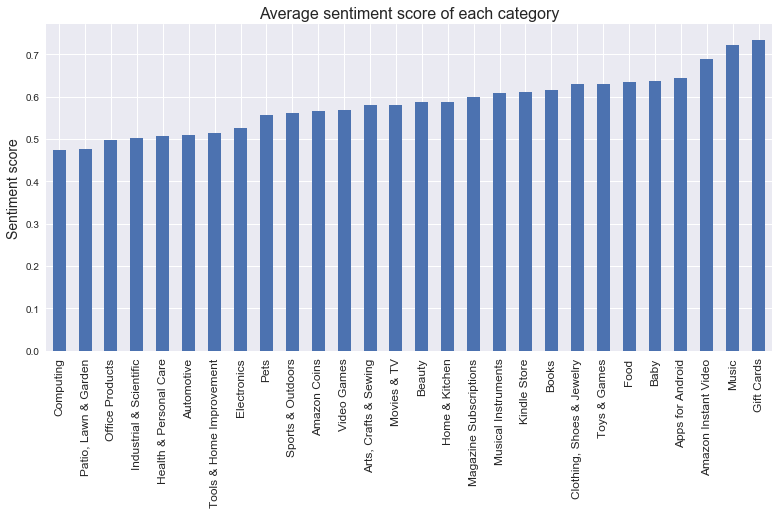

In [15]:
file = 'compound_category.txt'
print(file)
with open(file) as f:
    data = eval(f.read())

df = pd.DataFrame(data)
df.sort_values(df.columns[0], inplace=True)
df.plot(x=df.columns[1], y=df.columns[0], kind='bar', legend=False, grid=True)

plt.title('Average sentiment score of each category', fontsize=16)
plt.xlabel('')
plt.ylabel('Sentiment score', fontsize=14)
plt.xticks(fontsize=12)
plt.gcf().set_size_inches(FIGSIZE)

plt.gcf().savefig(file[:-3]+'png', bbox_inches='tight')

price_length.txt


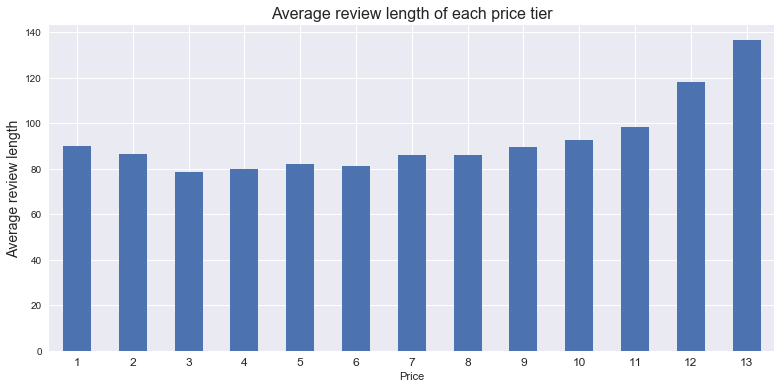

In [21]:
file = 'price_length.txt'
print(file)
with open(file) as f:
    data = eval(f.read())

df = pd.DataFrame(data)
df.sort_values(df.columns[1], inplace=True)
df.plot(x=df.columns[1], y=df.columns[0], kind='bar', legend=False, grid=True)

price_bins = np.array([
    0,
    10,
    20,
    30,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    200,
    500,
    1000
])
ticks = ['' for i in range(len(price_bins)-1)]

plt.title('Average review length of each price tier', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Average review length', fontsize=14)
plt.xticks(np.arange(13), fontsize=12, rotation=0)
plt.gcf().set_size_inches(FIGSIZE)

plt.gcf().savefig(file[:-3]+'png', bbox_inches='tight')

In [4]:
# 0: sort by value, 1: sort by ticks
sort_ticks = {'compound_category.txt': 0,
              'price_length.txt': 1,
              'rating_category.txt': 0,
              'rating_compound.txt': 1,
              'rating_length.txt': 1}

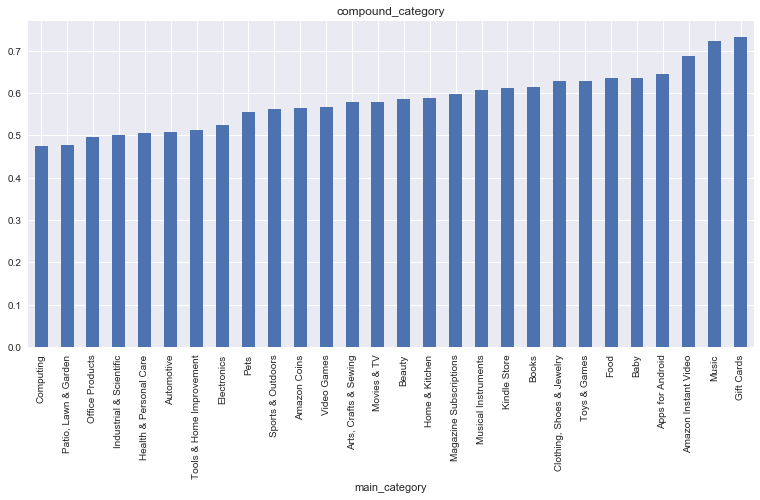

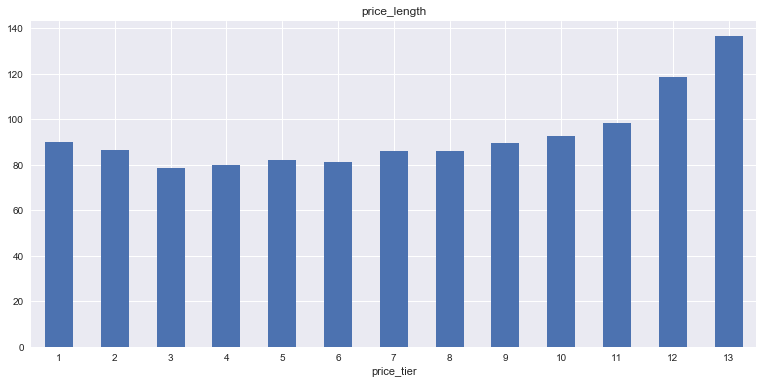

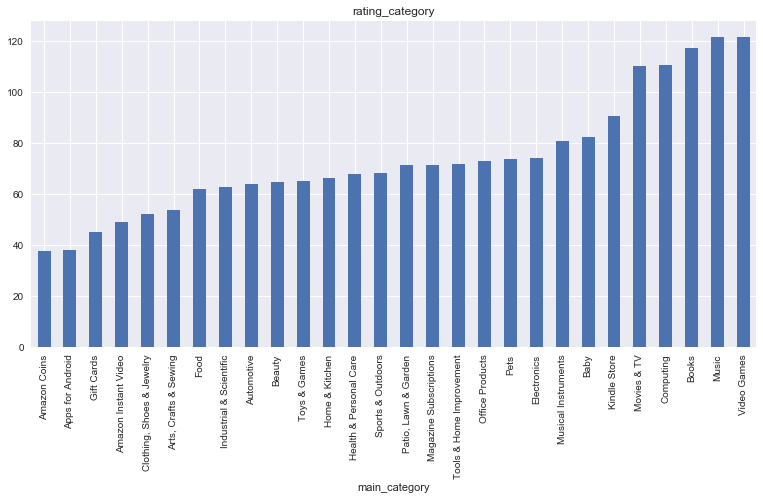

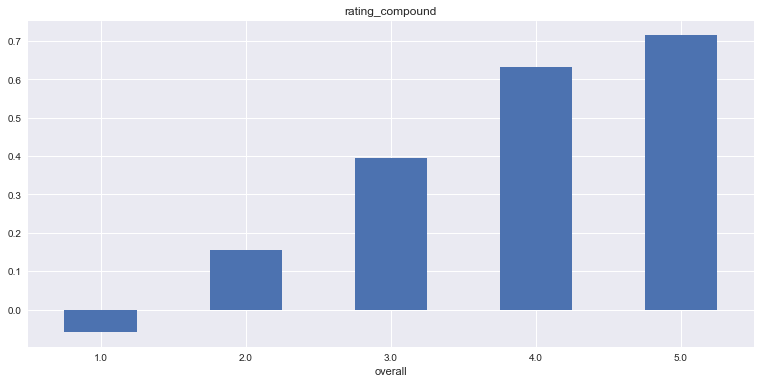

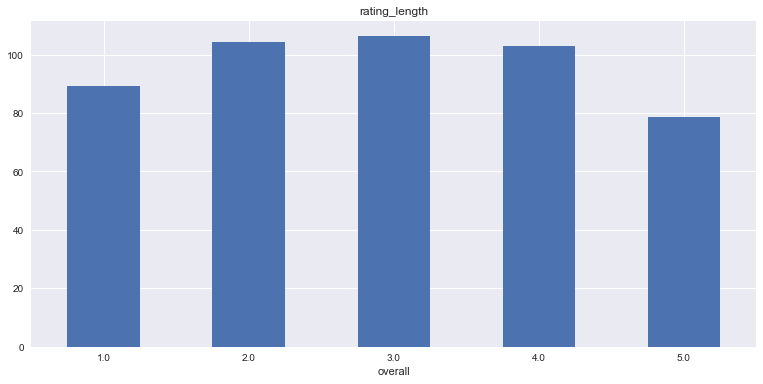

In [5]:
for file in sort_ticks.keys():
    with open(file) as f:
        data = eval(f.read())
    
    # Scalar data only
    if len(data[0]) > 2:
        continue
    
    df = pd.DataFrame(data)
    if sort_ticks[file]:
        df.sort_values(df.columns[1], inplace=True)
        rotation = 0
    else:
        df.sort_values(df.columns[0], inplace=True)
        rotation = 90
    df.plot(x=df.columns[1], y=df.columns[0], kind='bar',
            legend=False, grid=True)
    plt.xticks(rotation=rotation)
    plt.title(file[:-4])
    plt.gcf().set_size_inches(FIGSIZE)
    
    plt.gcf().savefig(file[:-3]+'png', bbox_inches='tight')

   1 star  2 star   3 star   4 star    5 star
0  884124  345034   284783   307272    559073
1  890996  379792   314594   269122    524529
2  800438  392767   367226   321459    666274
3  616247  355208   381125   358924    746529
4  389223  261511   324905   336722    629428
5  690983  444028   608172   732021   1817739
6  499792  373381   611809   867353   1938904
7  560114  437779   820048  1546114   4091466
8  616174  546625  1190270  2988286   9339511
9  823941  935458  2435505  8444966  32224631


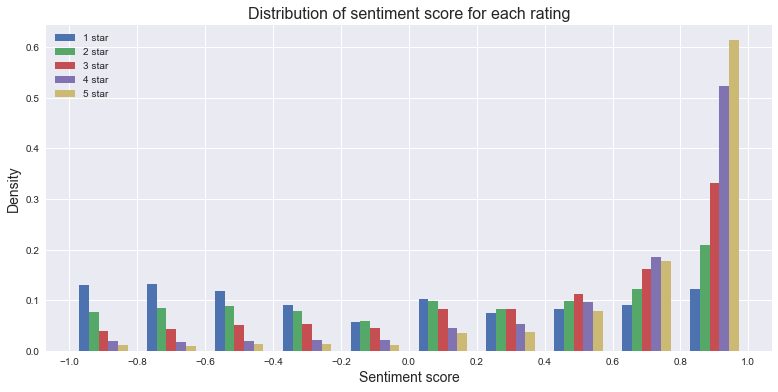

In [6]:
file = 'sent_rating.txt'
with open(file) as f:
    data = eval(f.read())
df = pd.DataFrame(data[1:], index=['1 star','2 star','3 star','4 star','5 star']).T
bins = np.array(data[0])
width = np.diff(bins)/7
center = (bins[:-1] + bins[1:]) / 2
bars = []
print(df)
fig, ax = plt.subplots(figsize=FIGSIZE)
for index, col in enumerate(df.columns):
    s = df[col]
    bars.append(ax.bar(bins[:-1]+width*(index+1+0.5), s/s.sum(), align='center', width=width))

ax.set_xticks(bins)
ax.legend(bars, df.columns)
plt.title('Distribution of sentiment score for each rating', fontsize=16)
plt.xlabel('Sentiment score', fontsize=14)
plt.ylabel('Density', fontsize=14)

fig.savefig(file[:-4]+'_bar.png', bbox_inches='tight')

   1 star  2 star   3 star   4 star    5 star
0  884124  345034   284783   307272    559073
1  890996  379792   314594   269122    524529
2  800438  392767   367226   321459    666274
3  616247  355208   381125   358924    746529
4  389223  261511   324905   336722    629428
5  690983  444028   608172   732021   1817739
6  499792  373381   611809   867353   1938904
7  560114  437779   820048  1546114   4091466
8  616174  546625  1190270  2988286   9339511
9  823941  935458  2435505  8444966  32224631


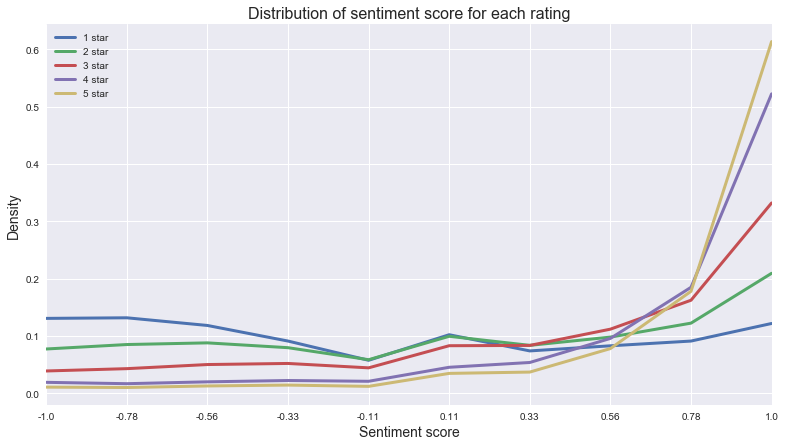

In [12]:
file = 'sent_rating.txt'
with open(file) as f:
    data = eval(f.read())
df = pd.DataFrame(data[1:], index=['1 star','2 star','3 star','4 star','5 star']).T
bins = np.array(data[0])
width = np.diff(bins)/5
center = (bins[:-1] + bins[1:]) / 2
bars = []
print(df)
fig, ax = plt.subplots(figsize=(13,7))
for index, col in enumerate(df.columns):
    s = df[col]
    (s/s.sum()).plot(linewidth=3, legend=True)

plt.xticks(np.arange(10), np.round(np.linspace(-1,1,10),2), rotation=0)
plt.title('Distribution of sentiment score for each rating', fontsize=16)
plt.xlabel('Sentiment score', fontsize=14)
plt.ylabel('Density', fontsize=14)

fig.savefig(file[:-4]+'_line.png', bbox_inches='tight')

sentiment_distribution_by_rating


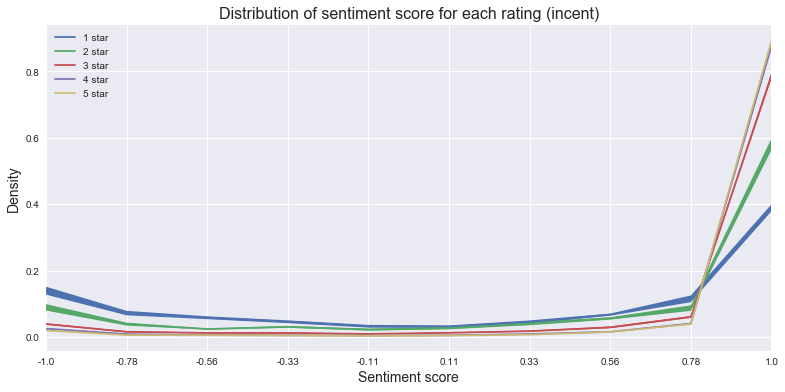

In [85]:
name = 'sentiment_distribution_by_rating'
print(name)

# Put data into a dataframe, and compute mean and confidence interval
data = np.array([d[name][1:] for d in incent])
data = np.apply_along_axis(lambda xs: [xs.mean(), errors(xs)[0], errors(xs)[1]], 0, data)
# print(data)

dfs = [pd.DataFrame(data[:,i,:].squeeze().T) for i in range(data.shape[1])]
for df in dfs:
#     print(df)
    pass

mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1

imgs = []
fig, ax = plt.subplots(figsize=FIGSIZE)
for id, df in enumerate(dfs[:]):
    df = df/df[0].sum()
    s = df[0]
    s = s.rename('{} star'.format(id+1))
    err = df[[1,2]].values-df[[0]].values
#     s.plot(ax=ax, yerr=err.T, legend=True)
    s.plot(ax=ax, legend=True)
    plt.fill_between(range(len(s)), df[1], df[2])

plt.xticks(np.arange(10), np.round(np.linspace(-1,1,10),2), rotation=0)
plt.title('Distribution of sentiment score for each rating (incent)', fontsize=16)
plt.xlabel('Sentiment score', fontsize=14)
plt.ylabel('Density', fontsize=14)

fig.savefig(name+'_incent.png', bbox_inches='tight')

sentiment_distribution_by_rating


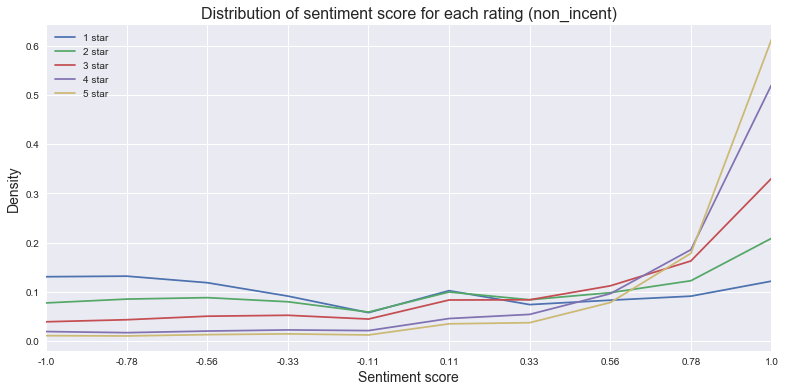

In [84]:
name = 'sentiment_distribution_by_rating'
print(name)

# Put data into a dataframe, and compute mean and confidence interval
data = np.array([d[name][1:] for d in non_incent])
data = np.apply_along_axis(lambda xs: [xs.mean(), errors(xs)[0], errors(xs)[1]], 0, data)
dfs = [pd.DataFrame(data[:,i,:].squeeze().T) for i in range(data.shape[1])]

mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1

imgs = []
fig, ax = plt.subplots(figsize=FIGSIZE)
for id, df in enumerate(dfs[:]):
    df = df/df[0].sum()
    s = df[0]
    s = s.rename('{} star'.format(id+1))
    err = df[[1,2]].values-df[[0]].values
    s.plot(ax=ax, legend=True)
    plt.fill_between(range(len(s)), df[1], df[2])

plt.xticks(np.arange(10), np.round(np.linspace(-1,1,10),2), rotation=0)
plt.title('Distribution of sentiment score for each rating (non_incent)', fontsize=16)
plt.xlabel('Sentiment score', fontsize=14)
plt.ylabel('Density', fontsize=14)

fig.savefig(name+'_non_incent.png', bbox_inches='tight')